# Import libraries

In [1]:
import cv2
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import PIL
from PIL import Image
from google.colab.patches import cv2_imshow
from dataclasses import dataclass
from pathlib import Path
import re
import pandas as pd
#imports Seaborn library and assigns shorthand 'sns'
import seaborn as sns
#imports Plotly library and assigns shorthand 'px'
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# File path and initialise var

In [9]:
# Read csv files
# get the path/directory
folder_dir = '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/'

# init list
csvnames=list()

for csv in range(19):
  csvnames.append(folder_dir + "map_scores_multi" + str(csv+1) + ".csv")
csvnames.sort()
print(csvnames)

['/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/map_scores_multi1.csv', '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/map_scores_multi10.csv', '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/map_scores_multi11.csv', '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/map_scores_multi12.csv', '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/map_scores_multi13.csv', '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/map_scores_multi14.csv', '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/map_scores_multi15.csv', '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/map_scores_multi16.csv', '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/map_scores_multi17.csv', '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/map_scores_multi18.csv', '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/map_scores_multi19.csv', '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/map_scores_multi2.csv', '/content/drive/M

Initialize data struct

Read csv

score1_av=np.zeros(100)
score2_av=np.zeros(100)
score3_av=np.zeros(100)
score4_av=np.zeros(100)
for i in range(20):
  df=pd.read_csv(csvnames[i])
  #score1
  new_score1=df.score1
  score1=new_score1.to_numpy()
  for j in range(len(score1)):
    if score1_av[j] !=0:
      score1_av[j]=(score1_av[j]+score1[j])/2
    else:
      score1_av[j]=score1[j]
  #score2
  new_score2=df.score2
  score2=new_score2.to_numpy()
  for j in range(len(score2)):
    if score2_av[j] !=0:
      score2_av[j]=(score2_av[j]+score2[j])/2
    else:
      score2_av[j]=score2[j]
  #score3
  new_score3=df.score3
  score3=new_score3.to_numpy()
  for j in range(len(score3)):
    if score3_av[j] !=0:
      score3_av[j]=(score3_av[j]+score3[j])/2
    else:
      score3_av[j]=score3[j]
  #score4
  new_score4=df.score4
  score4=new_score4.to_numpy()
  for j in range(len(score4)):
    if score4_av[j] !=0:
      score4_av[j]=(score4_av[j]+score4[j])/2
    else:
      score4_av[j]=score4[j]
score1_av=score1_av[score1_av != 0]
score2_av=score2_av[score2_av != 0]
score3_av=score3_av[score3_av != 0]
score4_av=score4_av[score4_av != 0]
print (score1_av)

In [10]:
def score_at_tx(score, x):
  # save only the xth e.g. 30, 6min score
  if len(score) < x:
    score_box=score[len(score)-1]
  else:
    score_box=score[x-1]
  return score_box

In [15]:
def save_score(mtype, sys, df1, df2, df3, df4):
  # Read csv files
  # get the path/directory
  folder_dir = '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/'
  num=19

  # init list
  csvnames=list()
  score1t=np.zeros(3)
  score2t=np.zeros(3)
  score3t=np.zeros(3)
  score4t=np.zeros(3)

  for csv in range(num):
    csvnames.append(folder_dir + "map_scores_" + sys + str(csv+1) + ".csv")
  csvnames.sort()
  #print(csvnames)

  first_attempt=np.zeros(num)
  print(mtype)
  for i in range(num):
    df=pd.read_csv(csvnames[i])
    if sys == "multi":
      df = df[df["maptype"] == mtype]
      # if main is not available at first, don't start counting attempts from 0
      time=df.timestep
      time=time.to_numpy()
      if time[0] != 0:
        # encounter time bc main map is not usually available at the start
        first_attempt[i] = int(time[0]/12+1) #start from 1 as long as it's not zero, for example 9 is attempt 1
      # save values as norm, repeat process for tb3_0 and tb3_1
      # zeros for when main map is not available
      zt=np.zeros(int(first_attempt[i]))
    #score1
    new_score1=df.score1
    score1=new_score1.to_numpy()
    #score2
    new_score2=df.score2
    score2=new_score2.to_numpy()
    #score3
    new_score3=df.score3
    score3=new_score3.to_numpy()
    #score4
    new_score4=df.score4
    score4=new_score4.to_numpy()

    if sys == "multi":
      score1=np.append(zt, score1)
      score2=np.append(zt, score2)
      score3=np.append(zt, score3)
      score4=np.append(zt, score4)
      i=i+20

    for j in range(3):
      x = 10 * (j+1) #timestep
      score1t[j]=score_at_tx(score1, x)
      score2t[j]=score_at_tx(score2, x)
      score3t[j]=score_at_tx(score3, x)
      score4t[j]=score_at_tx(score4, x)

    df1.loc[i]= sys, score1t[0], score1t[1], score1t[2]
    df2.loc[i]= sys, score2t[0], score2t[1], score2t[2]
    df3.loc[i]= sys, score3t[0], score3t[1], score3t[2]
    df4.loc[i]= sys, score4t[0], score4t[1], score4t[2]

  return df1, df2, df3, df4, first_attempt

In [16]:
df1=pd.DataFrame(columns=('sys', 't10', 't20', 't30'))
df2=pd.DataFrame(columns=('sys', 't10', 't20', 't30'))
df3=pd.DataFrame(columns=('sys', 't10', 't20', 't30'))
df4=pd.DataFrame(columns=('sys', 't10', 't20', 't30'))
df1, df2, df3, df4, _ = save_score("_main", "single", df1, df2, df3, df4)


_main


In [7]:
print(df1)

       sys   t10   t20   t30
0   single   8.0  12.0  12.0
1   single  13.0  16.0  19.0
2   single  13.0  14.0  16.0
3   single  19.0  17.0  17.0
4   single  17.0  16.0  16.0
5   single  15.0  17.0  17.0
6   single  16.0  19.0  19.0
7   single  16.0  20.0  19.0
8   single  14.0  15.0  16.0
9   single  16.0  14.0  14.0
10  single  15.0  15.0  19.0
11  single  14.0  15.0  16.0
12  single  21.0  17.0  16.0
13  single  17.0  17.0  18.0
14  single  10.0  12.0  12.0
15  single  14.0  15.0  15.0
16  single  10.0  12.0  12.0
17  single  17.0  15.0  15.0
18  single  17.0  18.0  18.0
19  single  14.0  16.0  17.0
20  single  16.0  17.0  17.0
21  single  18.0  16.0  17.0
22  single  13.0  19.0  19.0
23  single  21.0  17.0  17.0
24  single  18.0  18.0  18.0
25  single  20.0  21.0  21.0
26  single  18.0  22.0  21.0
27  single  10.0  13.0  17.0
28  single  13.0  16.0  17.0
29  single  16.0  17.0  16.0
30  single  17.0  18.0  18.0
31  single  14.0  16.0  18.0
32  single  15.0  19.0  19.0
33  single  19

In [17]:
df1, df2, df3, df4, _ = save_score("_main", "multi", df1, df2, df3, df4)


_main


# **Ploting**

In [18]:
def boxplot_grouped(df):
  df_long = pd.melt(df, "sys", var_name="t", value_name="score")
  g = sns.catplot(kind='box', data=df_long, x='t', y='score', hue='sys', height=5, aspect=1)
  #sns.swarmplot(x='t', y='score', data=df_long, color='black', alpha=0.5)


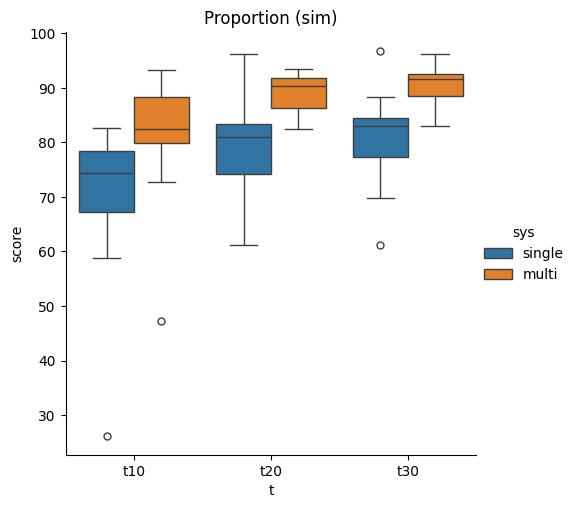

In [19]:
boxplot_grouped(df3)
plt.title('Proportion (sim)')
plt.savefig('/content/drive/MyDrive/FYP_multirobotSLAM/Plots_fig/score3box_exp1.png')

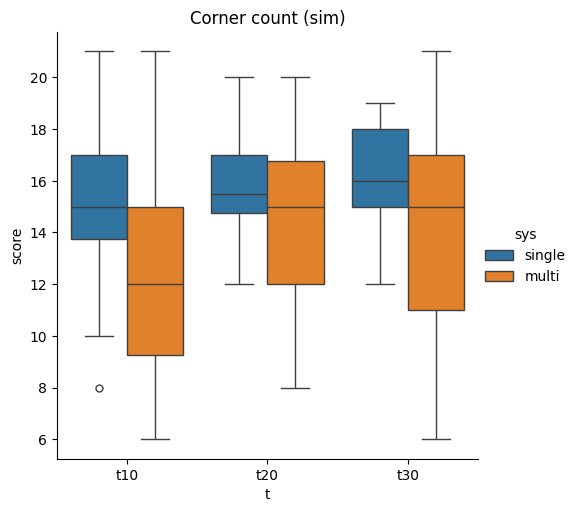

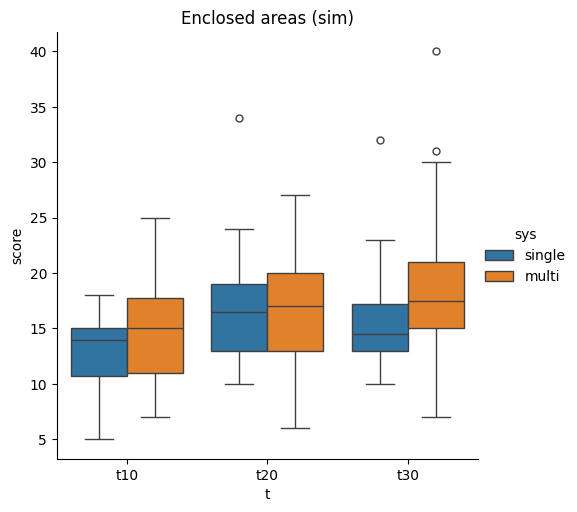

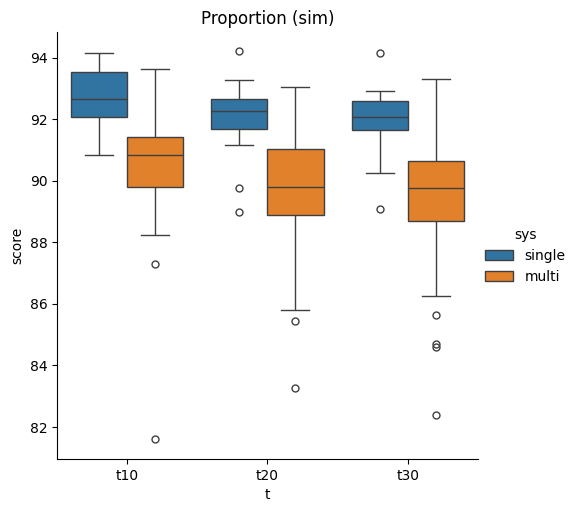

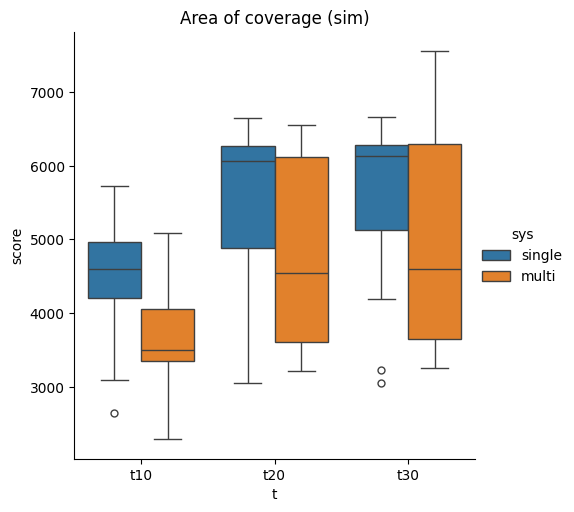

In [ ]:
boxplot_grouped(df1)
plt.title('Corner count (sim)')
plt.savefig('/content/drive/MyDrive/FYP_multirobotSLAM/Plots_fig/score1box_sim.png')
boxplot_grouped(df2)
plt.title('Enclosed areas (sim)')
plt.savefig('/content/drive/MyDrive/FYP_multirobotSLAM/Plots_fig/score2box_sim.png')
boxplot_grouped(df3)
plt.title('Proportion (sim)')
plt.savefig('/content/drive/MyDrive/FYP_multirobotSLAM/Plots_fig/score3box_sim.png')
boxplot_grouped(df4)
plt.title('Area of coverage (sim)')
plt.savefig('/content/drive/MyDrive/FYP_multirobotSLAM/Plots_fig/score4box_sim.png')

<ipython-input-50-e35c3007d0b8>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box2, positions=[1,2], labels=['Single', 'Multi'])


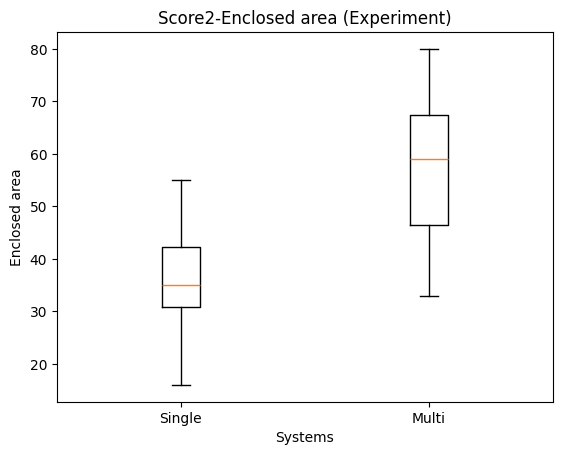

<ipython-input-51-0f6a396ee1c1>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box3, positions=[1,2], labels=['Single', 'Multi'])


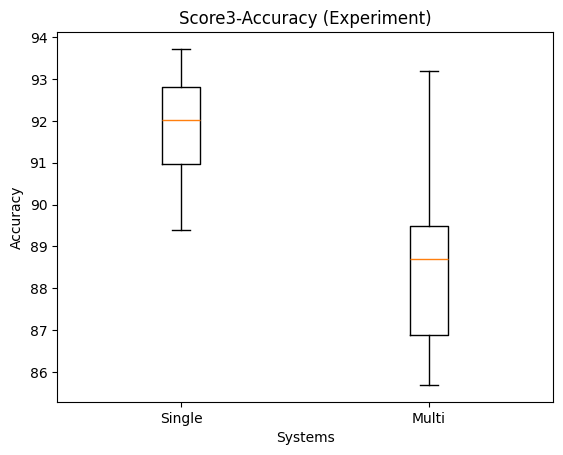

In [ ]:
box3= [single_score3_box, multi_score3_box]
plt.boxplot(box3, positions=[1,2], labels=['Single', 'Multi'])

plt.title('Score3-Accuracy (Experiment)')
plt.xlabel('Systems')
plt.ylabel('Accuracy')
plt.show()
#plt.savefig('/content/drive/MyDrive/FYP_multirobotSLAM/Plots_fig/score3box_exp.png')

<ipython-input-52-ee2916a297e5>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box4, positions=[1,2], labels=['Single', 'Multi'])


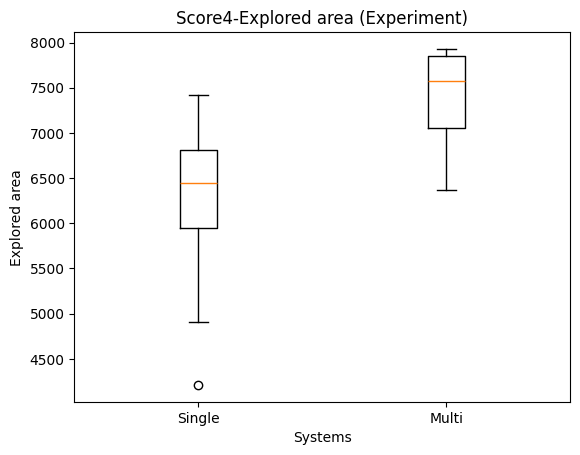

In [ ]:
box4= [single_score4_box, multi_score4_box]
plt.boxplot(box4, positions=[1,2], labels=['Single', 'Multi'])

plt.title('Score4-Explored area (Experiment)')
plt.xlabel('Systems')
plt.ylabel('Explored area')
plt.show()
#plt.savefig('/content/drive/MyDrive/FYP_multirobotSLAM/Plots_fig/score4box_exp.png')